Parseamos y estandarizamos los datos de los países de europa

In [1]:
from utils.file_utils import parse_countries_data, standarize_data
import matplotlib.pyplot as plt
attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

from ex_1.comparing_parameters import update_learn_rate_constant, update_learn_rate_exp, update_learn_rate_linear, update_radius_constant, update_radius_exp, update_radius_linear

import numpy as np

Parameters

In [2]:
# grilla de salida es de dimensión output_dimension*output_dimension
output_dimension = 4

#nro de epocas
epoch_limit = 3500

# tasa de aprendizaje inicial
initial_learning_rate = 1

# radio inicial
initial_radius = np.ceil(output_dimension*output_dimension/2)

# función de actualización de tasa de aprendizaje
update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp

In [3]:
import networks.kohonen as kohonen
import numpy as np
kohonen_network = kohonen.KohonenNetwork(std.shape[1], output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
epochs =[]
errors = []
u_mat = []
def callback_fun(e, error):
    errors.append(error)
    epochs.append(e)
    u_mat.append(np.mean(kohonen_network.u_matrix()))

kohonen_network.train(std, countries, epoch_limit, callback_fun )


<Figure size 2160x2160 with 0 Axes>

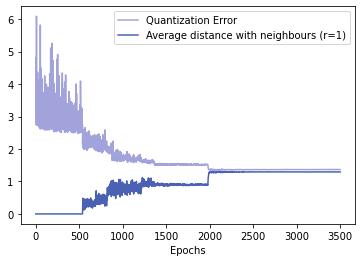

<Figure size 2160x2160 with 0 Axes>

In [8]:
# plot error vs epochs

plt.plot(epochs, errors, color="#a2a3da", label="Quantization Error")
plt.xlabel("Epochs")

plt.plot(epochs, u_mat, color="#4b62b4", label="Average distance with neighbours (r=1)")
plt.legend()
plt.figure(figsize=(30, 30))


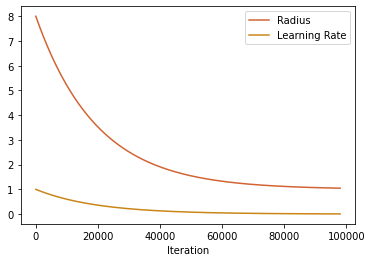

In [12]:

# plot radius values through iterations
plt.plot(range(len(kohonen_network.radius_values)), kohonen_network.radius_values, color="#d26333", label="Radius")
plt.plot(range(len(kohonen_network.learning_rate_values)), kohonen_network.learning_rate_values, color="#c98516", label="Learning Rate")
plt.xlabel("Iteration")
plt.legend()

In [13]:
distances = np.zeros((output_dimension, output_dimension))
heatmap_data = np.zeros((output_dimension, output_dimension))
country_names = [['' for i in range(output_dimension)] for j in range(output_dimension)]
isolated_variables = np.zeros((len(std[0]),output_dimension, output_dimension))
for c,_input in enumerate(std):
    i, j, d = kohonen_network.get_activated_neuron(_input)
    distances[i][j] += d
    heatmap_data[i][j] += 1
    country_names[i][j]+=countries[c]
    for l in range(len(_input)):
        isolated_variables[l][i][j] += std[c][l]

quantization_error = np.sum(distances)/len(std)
print(quantization_error)
print(country_names)

for i in range(output_dimension):
    for j in range(output_dimension):
        distances[i][j] /= heatmap_data[i][j]
        for l in range(len(_input)):
            isolated_variables[l][i][j] /= heatmap_data[i][j]



1.3669566639610247
[['Ukraine', 'Poland', 'Iceland', 'IrelandLuxembourgSwitzerland'], ['BulgariaEstoniaLatvia', 'Hungary', 'AustriaBelgiumDenmark', 'Netherlands'], ['', 'LithuaniaSlovakiaSlovenia', 'Czech Republic', 'GermanyNorway'], ['CroatiaGreece', 'Portugal', 'SpainUnited Kingdom', 'FinlandItalySweden']]


/tmp/ipykernel_4099/529485251.py:19: RuntimeWarning: invalid value encountered in double_scalars
  distances[i][j] /= heatmap_data[i][j]
/tmp/ipykernel_4099/529485251.py:21: RuntimeWarning: invalid value encountered in double_scalars
  isolated_variables[l][i][j] /= heatmap_data[i][j]


<AxesSubplot:>

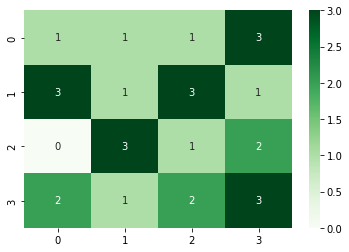

In [14]:
import seaborn as sns

sns.heatmap(heatmap_data, annot=True, cmap="Greens")


<AxesSubplot:>

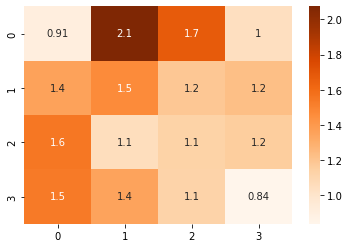

In [17]:
sns.heatmap(kohonen_network.u_matrix(), annot=True, cmap="Oranges")

Plot isolated variables

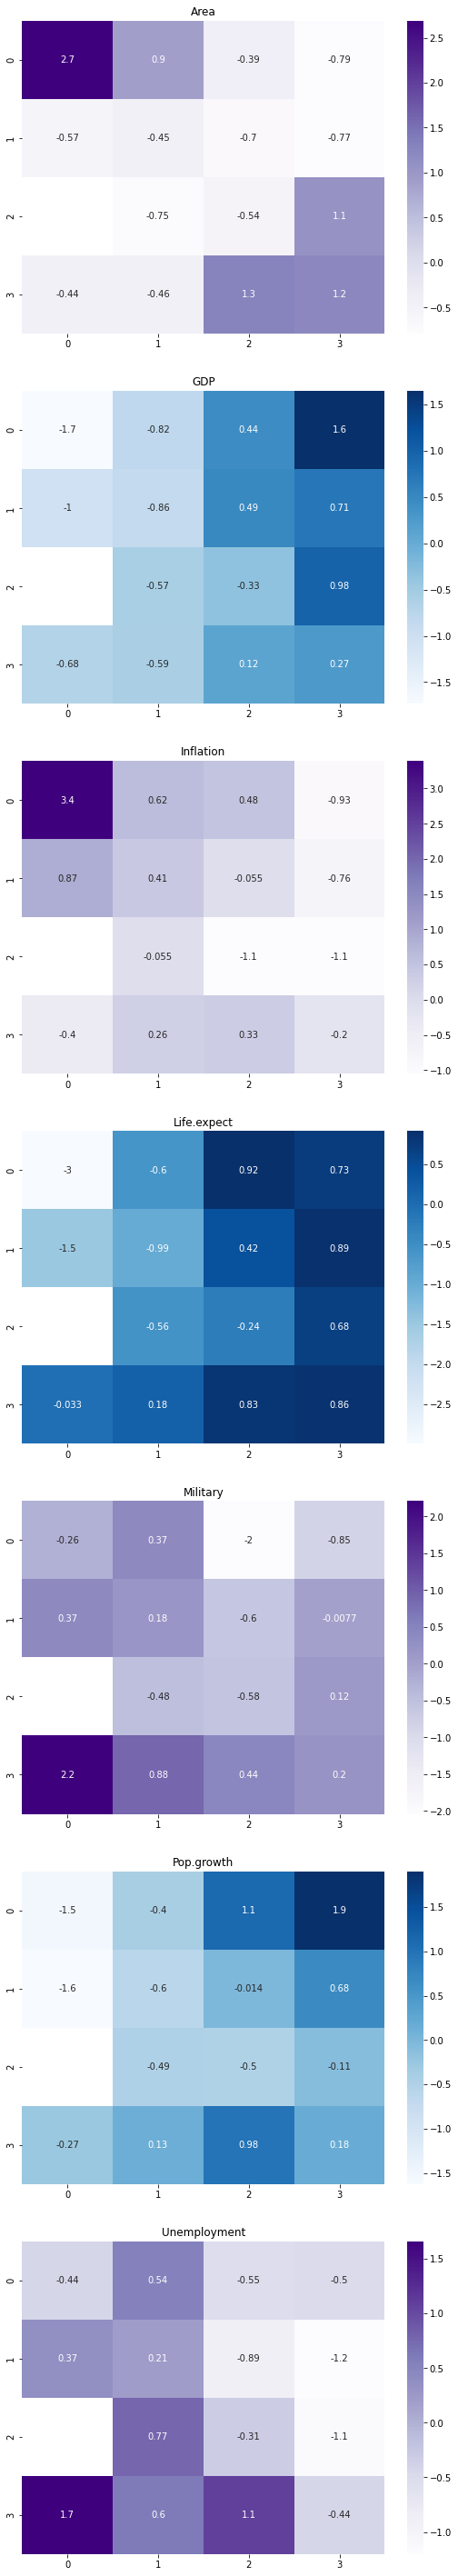

In [19]:
fig, ax = plt.subplots(len(std[0]),1, figsize=(8,40))
for i, var in enumerate(isolated_variables):
    ax[i].set_title(attributes[i])
    if i%2 == 0:
        cmap = "Purples"
    else:
        #turquoise
        cmap = "Blues"
    sns.heatmap(var, annot=True, ax=ax[i], cmap=cmap)
fig.tight_layout(pad=3.0)

In [21]:
execution_count = 10
# compare output dimension values
output_dim_values = range(2, 7)

update_radius_fns = [update_radius_constant, update_radius_linear, update_radius_exp]
update_learning_rate_fns = [update_learn_rate_constant, update_learn_rate_linear, update_learn_rate_exp]

attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

#nro de epocas
epoch_limit = 500*7

# dimension de input
input_dim = len(attributes)

# tasa de aprendizaje inicial
initial_learning_rate = 1

# función de actualización de tasa de aprendizaje
update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp
q_errors = [None]*execution_count
u_matrix_avg = [None]*execution_count
for output_dimension in output_dim_values:
    # radio inicial
    initial_radius = np.ceil(output_dimension*output_dimension/2)

    for j in range(execution_count):
        q_errors[j] = []
        kohonen_network = kohonen.KohonenNetwork(input_dim, output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
        kohonen_network.train(std, countries, epoch_limit, callback=None)
        q_error = kohonen_network.get_quantization_error(std)
        q_errors[j].append(q_error)
        u_matrix_avg[j] = np.mean(kohonen_network.u_matrix())
        print(f"output_dimension: {output_dimension}, execution: {j}, q_error: {q_error}, u_matrix_avg: {u_matrix_avg[j]}")

output_dimension: 2, execution: 0, q_error: 1.9584280581111269, u_matrix_avg: 1.181776189816579
output_dimension: 2, execution: 1, q_error: 1.9581043660149307, u_matrix_avg: 1.181052417654998
output_dimension: 2, execution: 2, q_error: 1.9582762660874995, u_matrix_avg: 1.1814028524731888
output_dimension: 2, execution: 3, q_error: 1.957674141685846, u_matrix_avg: 1.1852039016488687
output_dimension: 2, execution: 4, q_error: 1.9580108007854704, u_matrix_avg: 1.1815112472719298
output_dimension: 2, execution: 5, q_error: 1.9584289100246455, u_matrix_avg: 1.1845120996600806
output_dimension: 2, execution: 6, q_error: 1.958098582857469, u_matrix_avg: 1.1829509368894335
output_dimension: 2, execution: 7, q_error: 1.9578189554911192, u_matrix_avg: 1.1826830885144184
output_dimension: 2, execution: 8, q_error: 1.9575831777984782, u_matrix_avg: 1.184238245034364
output_dimension: 2, execution: 9, q_error: 1.9585954849448073, u_matrix_avg: 1.1827459475643647
output_dimension: 3, execution: 0, 

In [ ]:
f = open("ex_1/resources/compare_output_dim.txt", "r")
lines = f.readlines()

for line in lines:
    toks1 = line.split(",")
    toks2 = [toks1[1].split(" ")]
    for tok in toks1:
        toks2 = tok.split(":")

f.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


range(2, 7)
[[0.8483733975092252], [0.5781793474756395], [0.7347884233414084], [0.6649513297090142], [0.7080421308262297], [0.6435657243242605], [0.7333584454892096], [0.7735373459939396], [0.874134084777567], [0.7361981555653695]]


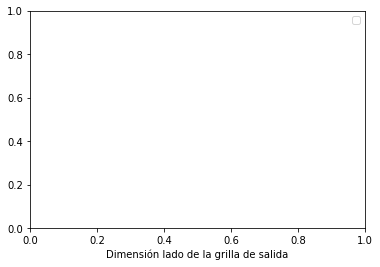

In [24]:
# plt.scatter(output_dim_values, np.mean(q_errors, axis=1), label="Quantization Error", color="#099c72")
# plt.errorbar(output_dim_values, np.mean(q_errors, axis=1), yerr=np.std(q_errors, axis=1), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")

# plt.scatter(output_dim_values, np.mean(u_matrix_avg, axis=0), label="Promedio de matriz U", color="#0460db")
# plt.errorbar(output_dim_values, np.mean(u_matrix_avg, axis=0), yerr=np.std(u_matrix_avg, axis=0), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")

plt.xlabel("Dimensión lado de la grilla de salida")
plt.legend()

In [40]:
update_learning_rate_fns = [update_learn_rate_constant, update_learn_rate_linear, update_learn_rate_exp]

attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)
output_dimension = 4

initial_radius = np.ceil(output_dimension*output_dimension/2)

#nro de epocas
epoch_limit = 300*7

# dimension de input
input_dim = len(attributes)

# tasa de aprendizaje inicial
initial_learning_rate = 1

# función de actualización de tasa de aprendizaje
# update_learning_rate = update_learn_rate_exp

#función de actualización de radio
update_radius = update_radius_exp
q_errors = [list()]*execution_count
u_matrix_avg = [list()]*execution_count
z=0
for update_learning_rate in update_learning_rate_fns:
    q_errors[z] = []
    for j in range(execution_count):
     
        kohonen_network = kohonen.KohonenNetwork(input_dim, output_dimension, initial_learning_rate, initial_radius, update_radius, update_learning_rate, random_weights=False)
        kohonen_network.train(std, countries, epoch_limit, callback=None)
        q_error = kohonen_network.get_quantization_error(std)
        q_errors[j].append(q_error)
        u_matrix_avg[j] = np.mean(kohonen_network.u_matrix())
        print(f"output_dimension: {output_dimension}, execution: {j}, q_error: {q_error}, u_matrix_avg: {u_matrix_avg[j]}")
    z+=1


output_dimension: 4, execution: 0, q_error: 1.7241317831063119, u_matrix_avg: 2.5196169688327448
output_dimension: 4, execution: 1, q_error: 1.6771368074545123, u_matrix_avg: 1.9868610461952856
output_dimension: 4, execution: 2, q_error: 1.7167948791324592, u_matrix_avg: 2.1120751334110084
output_dimension: 4, execution: 3, q_error: 1.6380297306391367, u_matrix_avg: 1.9487365711087246
output_dimension: 4, execution: 4, q_error: 1.714063976998108, u_matrix_avg: 2.1886218489928524
output_dimension: 4, execution: 5, q_error: 1.7214029717938986, u_matrix_avg: 3.3563338482264022
output_dimension: 4, execution: 6, q_error: 1.629152837977425, u_matrix_avg: 2.221126205792054
output_dimension: 4, execution: 7, q_error: 1.837547215651537, u_matrix_avg: 2.82296618345796
output_dimension: 4, execution: 8, q_error: 1.5380146573025144, u_matrix_avg: 2.6390694730051543
output_dimension: 4, execution: 9, q_error: 1.7986916934175707, u_matrix_avg: 2.49349527887123
output_dimension: 4, execution: 0, q_e

In [41]:
print(q_errors)
x_axis = list(range(len(update_learning_rate_fns)))
plt.scatter(x_axis, np.mean(q_errors, axis=1), label="Quantization Error", color="#099c72")
plt.errorbar(x_axis, np.mean(q_errors, axis=1), yerr=np.std(q_errors, axis=1), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")

plt.scatter(x_axis, np.mean(u_matrix_avg, axis=1), label="Promedio de matriz U", color="#0460db")
plt.errorbar(x_axis, np.mean(u_matrix_avg, axis=1), yerr=np.std(u_matrix_avg, axis=0), ecolor = 'grey', elinewidth = 0.5, capsize=1.5, fmt="o")

plt.xlabel("Función de actualización de la tasa de aprendizaje")
plt.xticks(x_axis, ["Constant", "Linear", "Exponential"])
plt.legend()

/home/camila/.local/lib/python3.8/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


AxisError: axis 1 is out of bounds for array of dimension 1